# Outliers
Extreme values are not necessarily due to error

In [53]:
import numpy as np # Numerical arrays
import matplotlib.pyplot as plt # Plotting
import scipy.stats as ss # Statistics
import pandas as pd

## LaTeX Mathematics

\$$  \$$ centres and puts on it's own line

\\$  \\$ does not centre and is inline

LaTeX info: https://en.wikibooks.org/wiki/LaTeX/Mathematics

## The Normal Distribution - Scaling
***

The probability density for the Gaussian distribution is

$$ \frac{1}{\sqrt(2 \pi \sigma^2)} $$

In [2]:
np.pi

3.141592653589793

In [3]:
np.sqrt(2)

1.4142135623730951

In [11]:
sigma = 1.0

In [12]:
1.0 / np.sqrt(2 * np.pi * sigma**2)

0.3989422804014327

C:\Users\elaine.tynan\AppData\Local\Temp\ipykernel_20180\3316134685.py:2: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(sigma_vals, 1.0 / np.sqrt(2 * np.pi * sigma_vals**2))


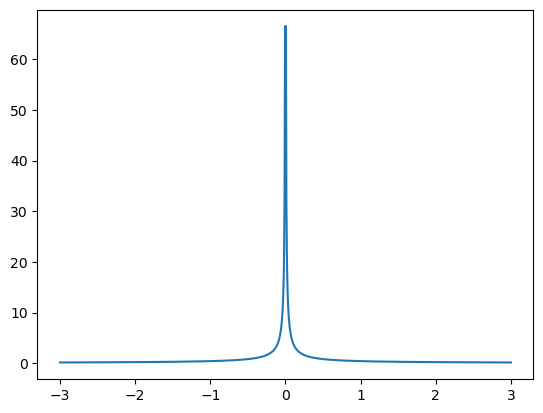

In [17]:
# This shows what happens as you change the value of the standard deviation.
# Standard deviatioj is on the x axis (between -3 and 3)
# these lines never meet (they are asymtotic)

sigma_vals = np.linspace(-3.0, 3.0, 1001) # Why 1001? https://www.google.com/search?client=firefox-b-d&q=fencepost+error
plt.plot(sigma_vals, 1.0 / np.sqrt(2 * np.pi * sigma_vals**2))

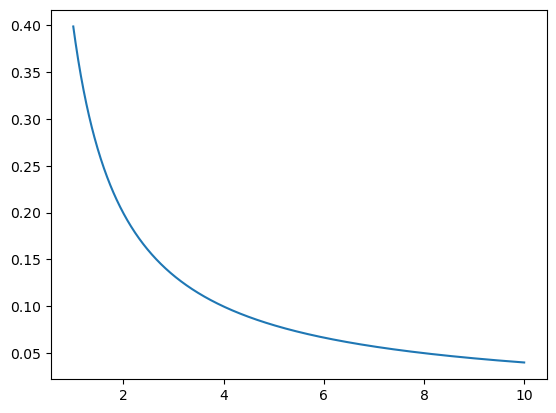

In [19]:
sigma_vals = np.linspace(1, 10.0, 1001)
plt.plot(sigma_vals, 1.0 / np.sqrt(2 * np.pi * sigma_vals**2))

# As sigma gets big, the whole value gets smaller

## The Normal Distribution $ e^{-\frac{(x - \mu)^2}{2 \sigma^2}} $

In [20]:
np.e

2.718281828459045

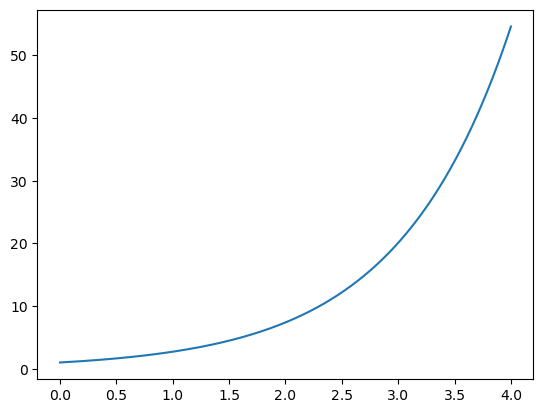

In [21]:
x = np.linspace(0.0, 4.0, 1000)

plt.plot(x, np.exp(x)) # e^x

$$ e^{-x} $$

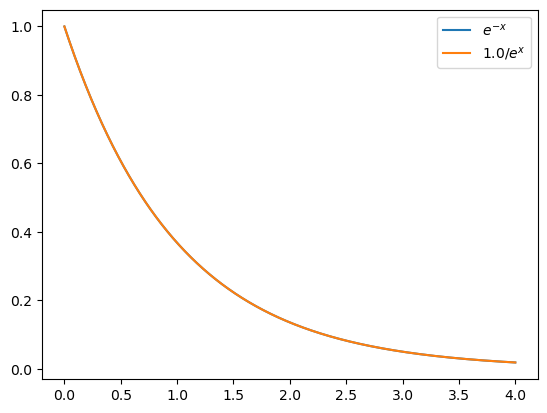

In [23]:
x = np.linspace(0.0, 4.0, 1000)

plt.plot(x, np.exp(-x), label=r'$e^{-x}$') # e^-x
plt.plot(x, 1.0 / np.exp(x), label=r'$1.0 / e^x$') # e^-x

# The 2 expressions are the same so we will ony see one as they overlay each other

plt.legend();

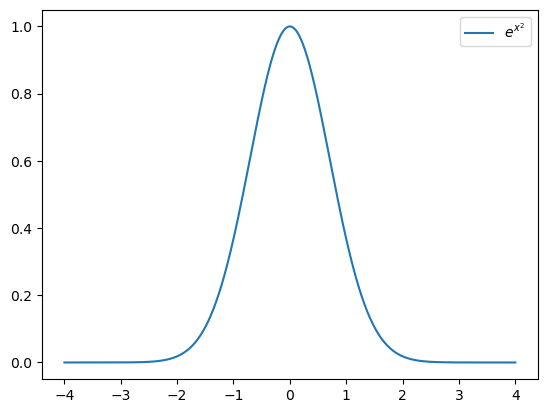

In [28]:
x = np.linspace(-4.0, 4.0, 1000)

# when you square x, negative numbers give you positive answer so the answers are the same
# for negative and positive, giveing an approximate bell shaped curve.
plt.plot(x, np.exp(-(x**2)), label=r'$e^{x^2}$')

plt.legend();

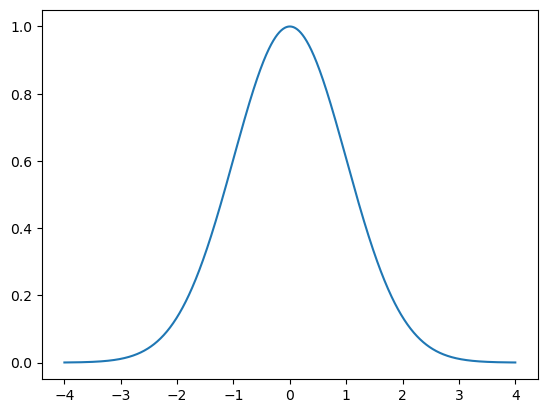

In [29]:
x = np.linspace(-4.0, 4.0, 1000)

# More towards the perfect bell curve
plt.plot(x, np.exp(-(x**2/2)))


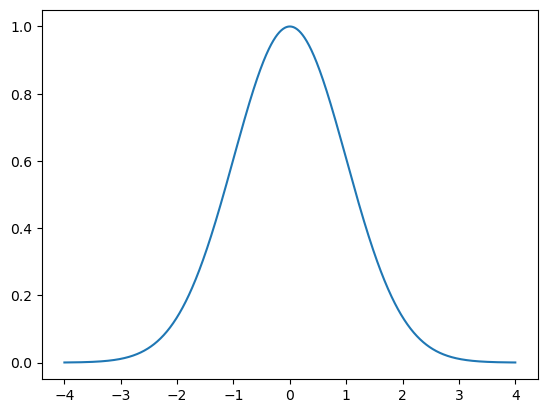

In [31]:
mu, sigma = 0.0, 1.0

x = np.linspace(-4.0, 4.0, 1000)

# More towards the perfect bell curve
plt.plot(x, np.exp(-((x- mu)**2/(2 * sigma**2))))

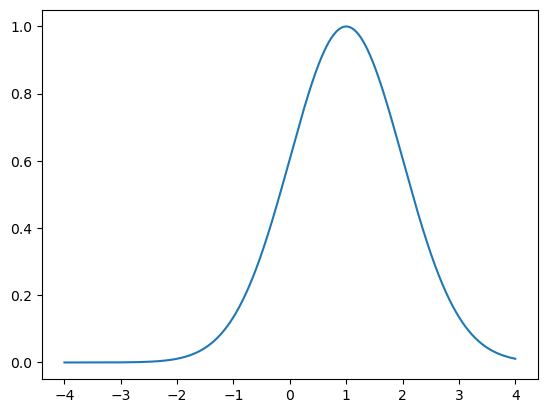

In [32]:
mu, sigma = 1.0, 1.0 # Move it so that it is centred on 1

x = np.linspace(-4.0, 4.0, 1000)

# More towards the perfect bell curve
plt.plot(x, np.exp(-((x- mu)**2/(2 * sigma**2))))

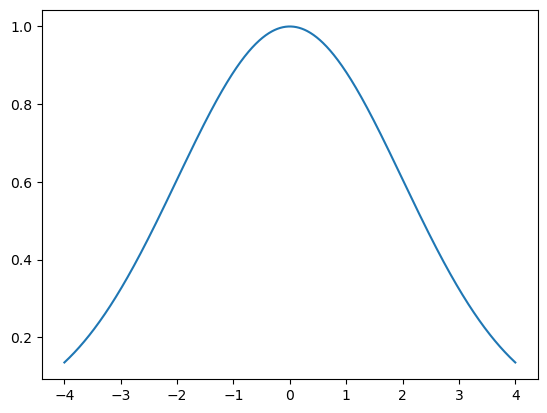

In [35]:
mu, sigma = 0.0, 2.0 # Make the spread wider

x = np.linspace(-4.0, 4.0, 1000)

plt.plot(x, np.exp(-((x- mu)**2/(2 * sigma**2))))

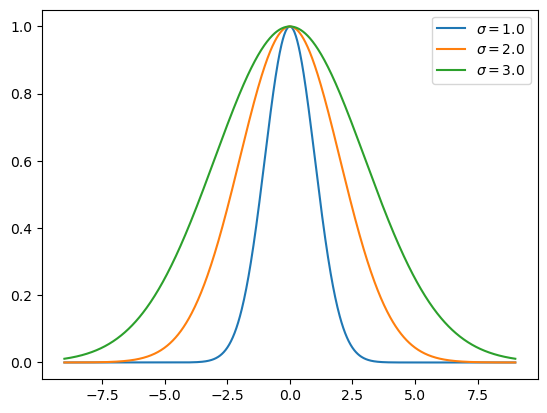

In [39]:
mu, sigma = 0.0, 3.0 # See how the curve gets wider as the standard deviation gets larger

x = np.linspace(-9.0, 9.0, 1000)

for sigma in [1.0, 2.0, 3.0]:
    plt.plot(x, np.exp(-((x- mu)**2/(2 * sigma**2))), label=rf'$\sigma = {sigma}$')

plt.legend()

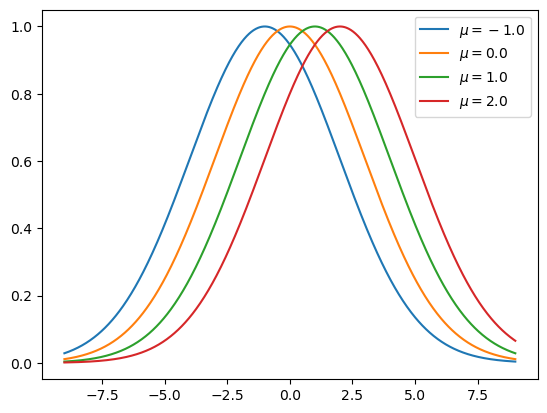

In [40]:
mu, sigma = 0.0, 3.0 # See how the curve moves as mu gets larger

x = np.linspace(-9.0, 9.0, 1000)

for mu in [-1.0, 0.0, 1.0, 2.0]:
    plt.plot(x, np.exp(-((x- mu)**2/(2 * sigma**2))), label=rf'$\mu = {mu}$')

plt.legend()

## Normal Distribution All together

$$ \frac{1}{\sigma \sqrt(2 \pi)} | e^{-\frac{(x - \mu)^2}{2 \sigma^2}} $$

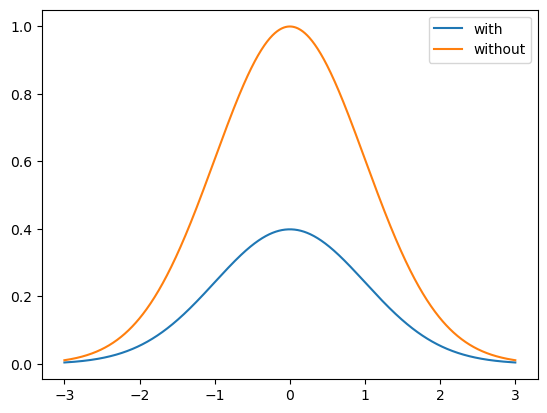

In [46]:
mu, sigma = 0.0, 1.0

x = np.linspace(-3.0, 3.0, 1000)

part1 = 1.0 / np.sqrt(2 * np.pi * sigma**2)
part2 = np.exp(-((x- mu)**2 / (2 * sigma**2)))
y = part1 * part2

plt.plot(x, y, label="with") # with: this is what we are really interested in
plt.plot(x, part2, label="without") # without 1/(sqrt(2 pi sigma^2))

plt.legend()

# Area under blue curve is 1

In [ ]:
mu, sigma = 0.0, 1.0

x = np.linspace(-9.0, 9.0, 1000)

part1 = 1.0 / np.sqrt(2 * np.pi * sigma**2)
part2 = np.exp(-((x- mu)**2 / (2 * sigma**2)))
y = part1 * part2

plt.plot(x, y)

# because the curve is semetric as it gets smaller it gets closer to 0 but never gets there.
# There is always the chance of extreme numbers, it may not be an outlier.

## Explanation of Curve

The area under the blue curve is 1.

If the probability of something is 1, it will definitely happen

You can read the probabilities of getting values by looking at the blue curve.

You can get a random value that looks like an outlier, for example 100. It's unlikely but possible that it is a valid number.

## Percentiles

In [47]:
np.random.normal(0.0, 1.0) # pick a random value on the curve

0.25301591566693804

In [48]:
# PPF is another name for Quartile (area under it is 1).
ss.norm().ppf(0.1) # Percent-Point Function
# 10% of the values in the blue curve are less than this (10% of the area is at -1.28155)

-1.2815515655446004

In [49]:
ss.norm().ppf(0.5)
# 50% of the values are less than this (50% of the area is at 0)

0.0

In [50]:
ss.norm().ppf(0.99)
# Gives point where 99% of area under blue curve is to the left

2.3263478740408408

In [51]:
ss.norm.cdf(0.5)
# Cumulative Density function ( distribution function )
# If I take the value 0 on blue curve, what is the probability of selecting a value less than 
# that value?

# This is like the ppf but it cumulates the values as it goes up, this goes up to 1 (as opposed to have the area under it being 1)/

0.6914624612740131

In [52]:
ss.norm.cdf(1.0) - ss.norm.cdf(-1.0) # 68% empirical rules 1 standard deviation

0.6826894921370859

In [57]:
ss.norm.cdf(2.0) - ss.norm.cdf(-2.0) # 95% empirical rules 2 standard deviations

0.9544997361036416

In [58]:
ss.norm.cdf(3.0) - ss.norm.cdf(-3.0) # 99% empirical rules 3 standard deviations

0.9973002039367398

### What does the blue curve represent?
Some form of probability of selecting values on the x-axis

By in large you are going to get values between 3 & -3. The more you pick the more that will be bunched around 0.

## Quartiles

In [59]:
ss.norm().ppf(0.75) # 75%

0.6744897501960817

In [60]:
ss.norm().ppf(0.5) # 50%

0.0

In [61]:
ss.norm().ppf(0.25) # 25%

-0.6744897501960817

## Box Plots
***

A classical data of Michelson (but not this one with Morley) on measurements done on the speed of light

The dta cosists of five experiments, each consisting of 20 consecutive 'runs'.

The response is the speed of light measurement, suitably coded (km/sec, with 299000 subtracted)
***

Colums are:

Expt : experiment (1 to 5)

Run: The run number within each experiment

Speed: Speed of light measurement (the one we are interested in)

In [11]:
# Reading in the morley data.

# skip first line, delimited by comma, delete double quotes
# pandas would have brought this in cleaner and easier
data = np.genfromtxt('data/morley.csv', skip_header=1, delimiter=',', deletechars='"')

# ignore the first column as it is not being read in properly [rows, columns] : means everything 1: means skip the first
data = data[:,1:]

data

array([[1.00e+00, 1.00e+00, 8.50e+02],
       [1.00e+00, 2.00e+00, 7.40e+02],
       [1.00e+00, 3.00e+00, 9.00e+02],
       [1.00e+00, 4.00e+00, 1.07e+03],
       [1.00e+00, 5.00e+00, 9.30e+02],
       [1.00e+00, 6.00e+00, 8.50e+02],
       [1.00e+00, 7.00e+00, 9.50e+02],
       [1.00e+00, 8.00e+00, 9.80e+02],
       [1.00e+00, 9.00e+00, 9.80e+02],
       [1.00e+00, 1.00e+01, 8.80e+02],
       [1.00e+00, 1.10e+01, 1.00e+03],
       [1.00e+00, 1.20e+01, 9.80e+02],
       [1.00e+00, 1.30e+01, 9.30e+02],
       [1.00e+00, 1.40e+01, 6.50e+02],
       [1.00e+00, 1.50e+01, 7.60e+02],
       [1.00e+00, 1.60e+01, 8.10e+02],
       [1.00e+00, 1.70e+01, 1.00e+03],
       [1.00e+00, 1.80e+01, 1.00e+03],
       [1.00e+00, 1.90e+01, 9.60e+02],
       [1.00e+00, 2.00e+01, 9.60e+02],
       [2.00e+00, 1.00e+00, 9.60e+02],
       [2.00e+00, 2.00e+00, 9.40e+02],
       [2.00e+00, 3.00e+00, 9.60e+02],
       [2.00e+00, 4.00e+00, 9.40e+02],
       [2.00e+00, 5.00e+00, 8.80e+02],
       [2.00e+00, 6.00e+0

In [13]:
exper_1 = data[:20, 2] # up to 20, column/index 2

{'whiskers': [<matplotlib.lines.Line2D at 0x19a8c627880>,
 'caps': [<matplotlib.lines.Line2D at 0x19a8c627e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x19a8c6276d0>],
 'medians': [<matplotlib.lines.Line2D at 0x19a8c642400>],
 'fliers': [<matplotlib.lines.Line2D at 0x19a8c6426d0>],
 'means': []}

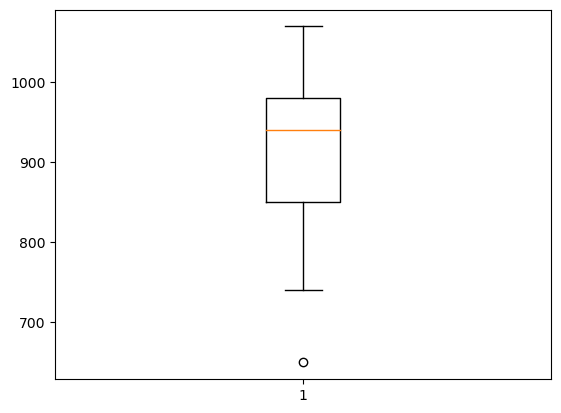

In [14]:
# Create a boxplot
# Pandas can do boxplots but we are using matplotlib.pyplot.boxplot
plt.boxplot(exper_1)

In [15]:
exper_2 = data[20:40, 2] # 20 up to 40, column/index 2

{'whiskers': [<matplotlib.lines.Line2D at 0x19a8d0db760>,
 'caps': [<matplotlib.lines.Line2D at 0x19a8d0dbd30>,
 'boxes': [<matplotlib.lines.Line2D at 0x19a8d0db490>,
 'medians': [<matplotlib.lines.Line2D at 0x19a8d0e9310>,
 'fliers': [<matplotlib.lines.Line2D at 0x19a8d0e95e0>,
 'means': []}

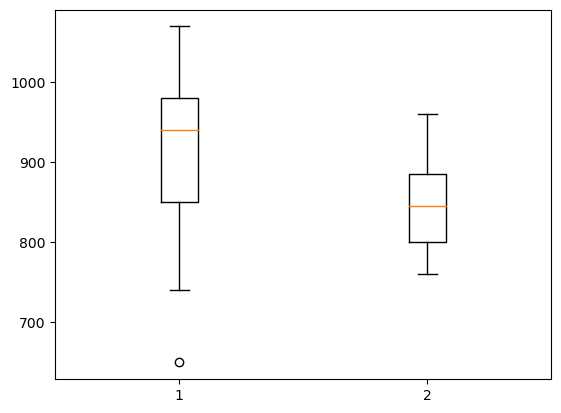

In [18]:
# Create a boxplot of both experiments
plt.boxplot(np.array([exper_1, exper_2]).T) # .T transpose the data to get the data in columns

In [19]:
all_exper = data[:,2].reshape(5, 20)
all_exper

array([[ 850.,  740.,  900., 1070.,  930.,  850.,  950.,  980.,  980.,
         880., 1000.,  980.,  930.,  650.,  760.,  810., 1000., 1000.,
         960.,  960.],
       [ 960.,  940.,  960.,  940.,  880.,  800.,  850.,  880.,  900.,
         840.,  830.,  790.,  810.,  880.,  880.,  830.,  800.,  790.,
         760.,  800.],
       [ 880.,  880.,  880.,  860.,  720.,  720.,  620.,  860.,  970.,
         950.,  880.,  910.,  850.,  870.,  840.,  840.,  850.,  840.,
         840.,  840.],
       [ 890.,  810.,  810.,  820.,  800.,  770.,  760.,  740.,  750.,
         760.,  910.,  920.,  890.,  860.,  880.,  720.,  840.,  850.,
         850.,  780.],
       [ 890.,  840.,  780.,  810.,  760.,  810.,  790.,  810.,  820.,
         850.,  870.,  870.,  810.,  740.,  810.,  940.,  950.,  800.,
         810.,  870.]])

## What is a boxplot

A boxplot is a standardized way of displaying the dataset based on the five-number summary:
the minimum, the maximum, the sample median, and the first and third quartiles.

A box-plot usually includes two parts, a box and a set of whiskers.

The box is drawn from Q1 to Q3 with a horizontal line drawn in the middle to denote the median.

The whiskers can be defined in various ways.

In the most straight-forward method, the boundary of the lower whisker is the minimum value of the data set, and the boundary of the upper whisker is the maximum value of the data set.

Another popular choice for the boundaries of the whiskers is based on the 1.5 IQR value.
From above the upper quartile (Q3), a distance of 1.5 times the IQR is measured out and a whisker is drawn up to the largest observed data point from the dataset that falls within this distance.
Similarly, a distance of 1.5 times the IQR is measured out below the lower quartile (Q1) and a whisker is drawn down to the lowest observed data point from the dataset that falls within this distance.

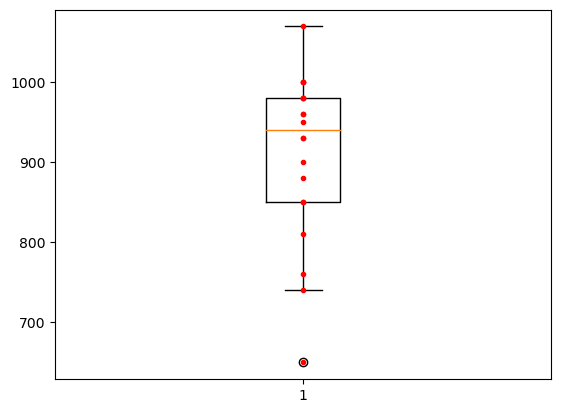

In [23]:
# Creat a figure
fig, ax = plt.subplots()

# Add a boxplot
ax.boxplot(exper_1)

# Plot red dots at (1,value) for each value in exper_1.
ax.plot(np.ones(exper_1.shape), exper_1, 'r.')

In [35]:
# Median of exper_1 (middle value)
median = np.median(exper_1) # Orange line in boxplot above

In [26]:
# Quartiles
q1 = np.percentile(exper_1, 25) # bottom of box
q3 = np.percentile(exper_1, 75) # top of box
print(q1)
print(q3)

850.0
980.0


In [33]:
iqr = np.percentile(exper_1, 75) - np.percentile(exper_1, 25)

In [40]:
min = np.min(exper_1)
max = np.max(exper_1)
print(min)
print(max)

650.0
1070.0


In [41]:
# Calculate the mean - three ways.
exper_1.mean()
np.mean(exper_1)
sum(exper_1) / len(exper_1)

909.0

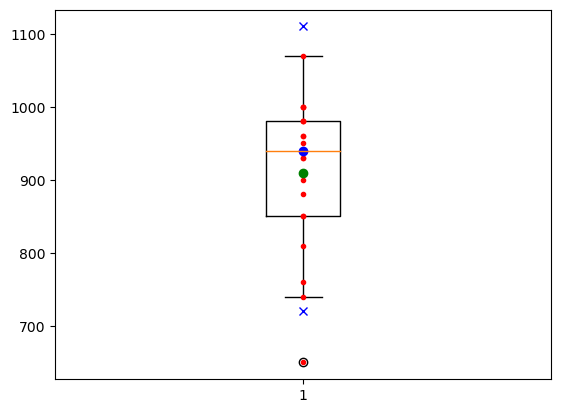

In [39]:
# Create a figure.
fig, ax = plt.subplots()

# Add the boxplot.
ax.boxplot(exper_1)

# Plots red dots at (1, value) for each value in exper_1.
ax.plot(np.ones(exper_1.shape), exper_1, 'r.')

# Add the max whisker lengths.
ax.plot([1.0, 1.0], [q1 - iqr, q3 + iqr], 'bx')

# Plot the mean & median
ax.plot([1.0], [np.mean(exper_1)], 'go')
ax.plot([1.0], median, 'bo')

In [70]:
# Values above the mean.
exper_1[exper_1 > exper_1.mean()]

array([1070.,  930.,  950.,  980.,  980., 1000.,  980.,  930., 1000.,
       1000.,  960.,  960.])

In [71]:
# Values below the mean.
exper_1[exper_1 < exper_1.mean()]

array([850., 740., 900., 850., 880., 650., 760., 810.])

### Analysis

There are more values above the mena than there are below it.

With the Median there are equal amount of values above and below it.

## Exercise 1 - Morely Data Set

Create box plots on a single set of axes for all five experiments in the morley data set.

In [42]:
all_exper = data[:,2].reshape(5, 20).T
all_exper

array([[ 850.,  960.,  880.,  890.,  890.],
       [ 740.,  940.,  880.,  810.,  840.],
       [ 900.,  960.,  880.,  810.,  780.],
       [1070.,  940.,  860.,  820.,  810.],
       [ 930.,  880.,  720.,  800.,  760.],
       [ 850.,  800.,  720.,  770.,  810.],
       [ 950.,  850.,  620.,  760.,  790.],
       [ 980.,  880.,  860.,  740.,  810.],
       [ 980.,  900.,  970.,  750.,  820.],
       [ 880.,  840.,  950.,  760.,  850.],
       [1000.,  830.,  880.,  910.,  870.],
       [ 980.,  790.,  910.,  920.,  870.],
       [ 930.,  810.,  850.,  890.,  810.],
       [ 650.,  880.,  870.,  860.,  740.],
       [ 760.,  880.,  840.,  880.,  810.],
       [ 810.,  830.,  840.,  720.,  940.],
       [1000.,  800.,  850.,  840.,  950.],
       [1000.,  790.,  840.,  850.,  800.],
       [ 960.,  760.,  840.,  850.,  810.],
       [ 960.,  800.,  840.,  780.,  870.]])

{'whiskers': [<matplotlib.lines.Line2D at 0x19a91379ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x19a913c9280>,
 'boxes': [<matplotlib.lines.Line2D at 0x19a91379af0>,
 'medians': [<matplotlib.lines.Line2D at 0x19a913c9820>,
 'fliers': [<matplotlib.lines.Line2D at 0x19a913c9af0>,
 'means': []}

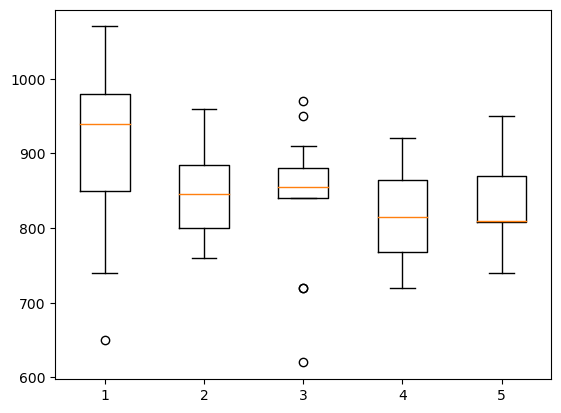

In [43]:
# Create a boxplot of all experiments
plt.boxplot(all_exper)

## Exercise 2 - Fisher's Iris Data Set

Create box plots for all of the numercial variables in Fisher's Iris Data Set.

In [69]:
# Reading in the iris dataset
# I used Pandas to read it in to avout the issue with the quotes, then I converted it to a numpy ndarray
iris_data_df = pd.read_csv('data/iris.csv')

iris_data = iris_data_df.to_numpy()

iris_data

array([[1, 5.1, 3.5, 1.4, 0.2, 'setosa'],
       [2, 4.9, 3.0, 1.4, 0.2, 'setosa'],
       [3, 4.7, 3.2, 1.3, 0.2, 'setosa'],
       [4, 4.6, 3.1, 1.5, 0.2, 'setosa'],
       [5, 5.0, 3.6, 1.4, 0.2, 'setosa'],
       [6, 5.4, 3.9, 1.7, 0.4, 'setosa'],
       [7, 4.6, 3.4, 1.4, 0.3, 'setosa'],
       [8, 5.0, 3.4, 1.5, 0.2, 'setosa'],
       [9, 4.4, 2.9, 1.4, 0.2, 'setosa'],
       [10, 4.9, 3.1, 1.5, 0.1, 'setosa'],
       [11, 5.4, 3.7, 1.5, 0.2, 'setosa'],
       [12, 4.8, 3.4, 1.6, 0.2, 'setosa'],
       [13, 4.8, 3.0, 1.4, 0.1, 'setosa'],
       [14, 4.3, 3.0, 1.1, 0.1, 'setosa'],
       [15, 5.8, 4.0, 1.2, 0.2, 'setosa'],
       [16, 5.7, 4.4, 1.5, 0.4, 'setosa'],
       [17, 5.4, 3.9, 1.3, 0.4, 'setosa'],
       [18, 5.1, 3.5, 1.4, 0.3, 'setosa'],
       [19, 5.7, 3.8, 1.7, 0.3, 'setosa'],
       [20, 5.1, 3.8, 1.5, 0.3, 'setosa'],
       [21, 5.4, 3.4, 1.7, 0.2, 'setosa'],
       [22, 5.1, 3.7, 1.5, 0.4, 'setosa'],
       [23, 4.6, 3.6, 1.0, 0.2, 'setosa'],
       [24, 5.1, 3.3

In [66]:
# Get the 4 columns of sepal length, sepal width, petal length & petal width
all_measures = iris_data[:,1:5]
all_measures

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3.0, 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5.0, 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5.0, 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3.0, 1.4, 0.1],
       [4.3, 3.0, 1.1, 0.1],
       [5.8, 4.0, 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1.0, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5.0, 3.0, 1.6, 0.2],
       [5.0, 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

{'whiskers': [<matplotlib.lines.Line2D at 0x19a981d7880>,
 'caps': [<matplotlib.lines.Line2D at 0x19a981d7160>,
 'boxes': [<matplotlib.lines.Line2D at 0x19a915b37f0>,
 'medians': [<matplotlib.lines.Line2D at 0x19a981dc3d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x19a981dc0d0>,
 'means': []}

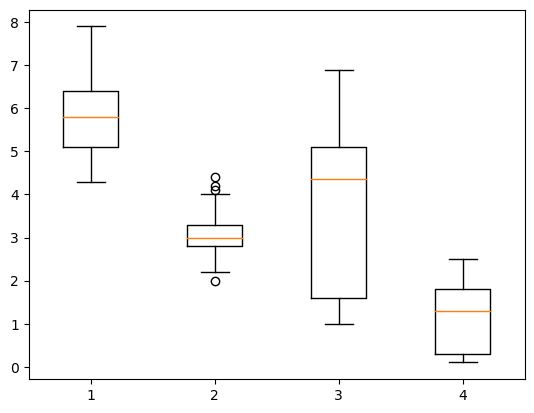

In [67]:
# Create a boxplot of all iris variables
plt.boxplot(all_measures)

## Conclusions

We can clearly see outliers in both data sets, although as expected there are not many of them.

## A Data Set

Create a plot and consider the set of numbers

In [72]:
# Create a series of x vectors.
xs = np.array([np.linspace(i, i + 2.0, 20) for i in range(10)])

# Create a corresponding series of y vectors.
ys = np.array([-1.0 * xs[i] + 2 * i for i in range(len(xs))])

# Add some noise.
ys = ys + np.random.normal(0.0, 1.0, ys.shape)



# Create global list of x and y values.
x = xs.flatten()
y = ys.flatten()

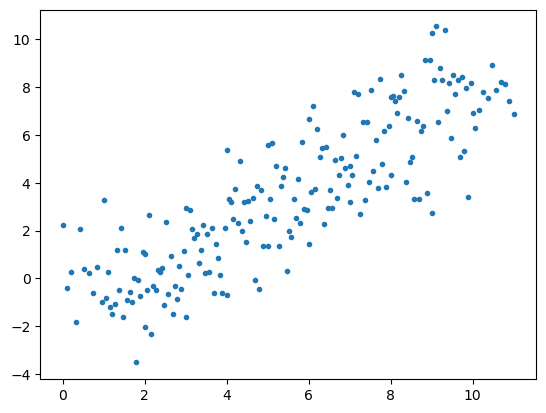

In [73]:
# Plot.
plt.plot(x, y, '.');

## Best Fit Line

A straight line is $ {y = mx + c} $

In [75]:
# Best fit line slope and y intercept.
m, c = np.polyfit(x, y, 1)
print(m)
print(c)

0.9101539748304396
-1.5543989710366788


In [76]:
# Create a steadily increasing x range for plotting.
xbestfit = np.linspace(x.min(), x.max(), 1000)

# Create corresponding y values form best fit line.
ybestfit = m * xbestfit + c

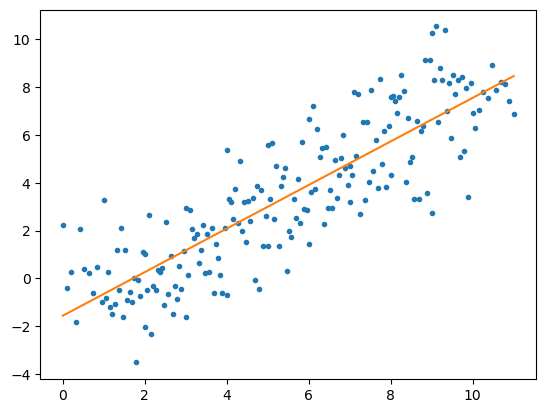

In [77]:
# Plot points.
plt.plot(x, y, '.')

# Plot line.
plt.plot(xbestfit, ybestfit);

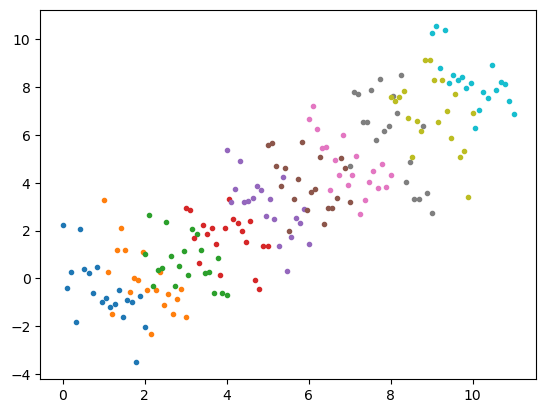

In [78]:
# Plot the same points, but now with a different colour for each range.
for i in range(len(xs)):
    plt.plot(xs[i], ys[i], '.')

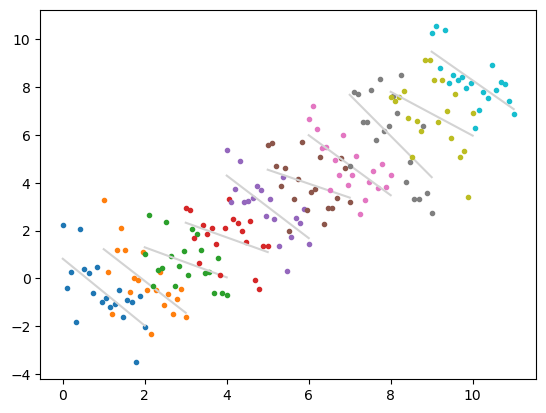

In [79]:
# Now plot with best fit lines for each category.
for i in range(len(xs)):
    # Plot this category.
    plt.plot(xs[i], ys[i], '.')
    # Fit line to category.
    m, c = np.polyfit(xs[i], ys[i], 1)
    # Create steadily increasing x range for plot.
    xbestfit = np.linspace(xs[i].min(), xs[i].max(), 50)
    # Corresponding y values based on best fit line.
    ybestfit = m * xbestfit + c
    # Plot best fit line for category.
    plt.plot(xbestfit, ybestfit, color='lightgrey');

## Exercise 3

Adapt the above code and plots so that the overall plot is inversely propertional and the individual groups are directly proportional.

In [101]:
# Create a series of x vectors.
new_xs = np.array([np.linspace(i, i + 2.0, 20) for i in range(10)])

# Create a corresponding series of y vectors.

new_ys = np.array([-1.0 * new_xs[i] + 2 * i for i in range(len(new_xs))])
new_ys = new_ys[::-1]

# Add some noise.
new_ys = new_ys + np.random.normal(0.0, 1.0, new_ys.shape)


# Create global list of x and y values.
new_x = new_xs.flatten()
new_y = new_ys.flatten()

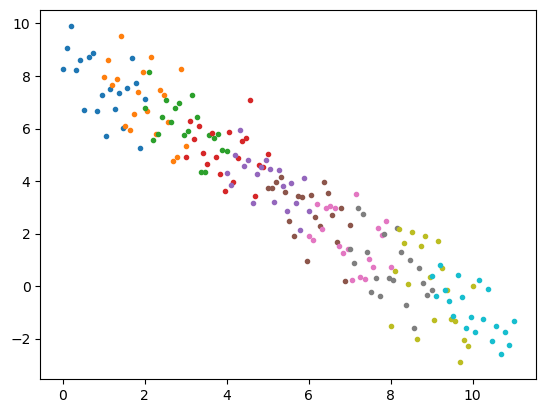

In [102]:
# Plot the same points, but now with a different colour for each range.
for i in range(len(xs)):
    plt.plot(new_xs[i], new_ys[i], '.')